<a href="https://colab.research.google.com/github/yeonghun00/stock-notes/blob/main/analysis/market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 코스피/코스닥 시총 100순위 변동 
- 1주일/1달 주도주 분석
- 상승률 변동 (20, 60, 120, 250) 
- 강한 테마/이슈 뉴스검색어와 분석으로 연속성 검증
- 조회수순? 영향력 강한 1주일 이내 공시 분석기
- 앞으로 상장할 주식 1주일 치 이슈에 부합하나
- 업황 분석기: 지난 1주 1달치 업황 상승률/ 거래대금 순위

In [1]:
!pip install exchange_calendars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# korean font
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip'
!unzip "NotoSansCJKkr-hinted.zip"
!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

--2022-09-25 04:35:53--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip.1’

NotoSansCJKkr-hinte 100%[===================>] 115.55M  24.6MB/s    in 4.7s    

2022-09-25 04:35:58 (24.6 MB/s) - ‘NotoSansCJKkr-hinted.zip.1’ saved [121163981/121163981]

Archive:  NotoSansCJKkr-hinted.zip
replace LICENSE_OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace LICENSE_OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: An
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: NotoSansCJKkr-De

In [4]:
from matplotlib import font_manager, rc
font_fname = '/usr/share/fonts/truetype/NotoSansCJKkr-Medium.otf'
font_manager.fontManager.addfont(font_fname)
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)
font_manager._rebuild()

In [5]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, date
import pandas as pd
import numpy as np
from io import StringIO
import exchange_calendars as ecals
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

XKRX = ecals.get_calendar("XKRX") # 한국 코드

Daily Community Keywords

In [6]:
url = "https://dcgle.com/galleries/kospi"
result = requests.get(url, headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'})
bs_obj = BeautifulSoup(result.content, "html.parser")
tr = bs_obj.find_all("div", {'class':'w-full text-right text-sm'})
texts = [x.get_text().replace(' ','').replace('\n','') for x in tr]

In [7]:
texts

['손실',
 '생각하시는분',
 '파이어백',
 '썰떨',
 '저점',
 '리앗',
 '러커',
 '데미지',
 '의슬',
 '어떻개',
 '2300',
 '700',
 '신용',
 '파이어',
 '백의',
 '생각하시는',
 '떨',
 'ㄷ',
 '인버스',
 '달러',
 '환율',
 '동원령',
 '주식',
 '코스피',
 '금리',
 '버스',
 '개새끼야',
 '국장',
 '하락',
 '지수',
 '종목',
 '매수',
 '1400',
 '푸틴',
 '삼전',
 '나스닥',
 'ㄷㄷㄷㄷㄷ',
 'vi',
 '운지',
 '금양',
 '하이닉스',
 '코갤',
 '양지사',
 'bp',
 '생트',
 '엔솔',
 'ㅡㅡ',
 '생계',
 '카겜',
 '47']

In [8]:
kospi_df = fdr.DataReader('KS11')
kospi_df['Change'] = kospi_df['Change'] + 1
kospi_df

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1981-05-01,123.60,123.60,123.60,123.60,3330000.0,1.0098
1981-05-02,123.50,123.50,123.50,123.50,2040000.0,0.9992
1981-05-04,120.60,120.60,120.60,120.60,1930000.0,0.9765
1981-05-06,120.70,120.70,120.70,120.70,1690000.0,1.0008
1981-05-07,119.30,119.30,119.30,119.30,1480000.0,0.9884
...,...,...,...,...,...,...
2022-09-19,2355.66,2388.73,2389.85,2352.76,403940000.0,0.9886
2022-09-20,2367.85,2373.64,2382.52,2359.84,419340000.0,1.0052
2022-09-21,2347.21,2351.54,2360.27,2341.79,378160000.0,0.9913


In [9]:
print('mean: ', kospi_df['Change'].mean())
print('var : ', kospi_df['Change'].var())
print('skewness : ', kospi_df['Change'].skew())
print('kurtosis : ', kospi_df['Change'].kurt())

mean:  1.00037143763022
var :  0.000211637063261896
skewness :  -0.05550891509683492
kurtosis :  5.50710133736519


In [10]:
import random
import math

m = kospi_df['Change'].mean()
var = kospi_df['Change'].var()

sample_num = 1000
periods = 250 # 250*40

dates = pd.date_range(start=date.today(), periods=periods)
close_li = [pd.DataFrame({'Change':[random.gauss(m, math.sqrt(var)) for i in range(periods)]}, index=dates) for x in range(sample_num)]
close_li = list(map(lambda x: np.cumprod(x).rename(columns={'Change':'Close'}) * kospi_df['Close'][-1], close_li))

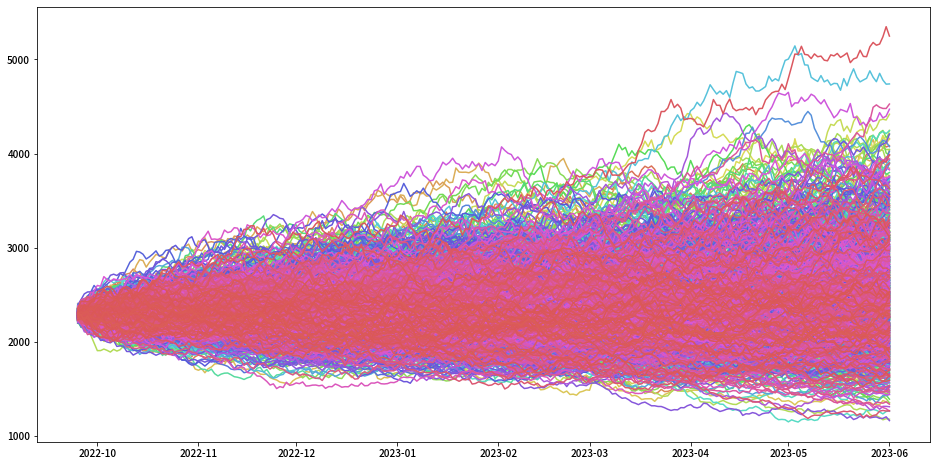

In [11]:
import seaborn as sns

fig = plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
colors = list(sns.color_palette("hls", sample_num).as_hex())

for i, j in enumerate(close_li):
  ax.plot(j['Close'], color=colors[i]) #, label=i+1)

plt.show()

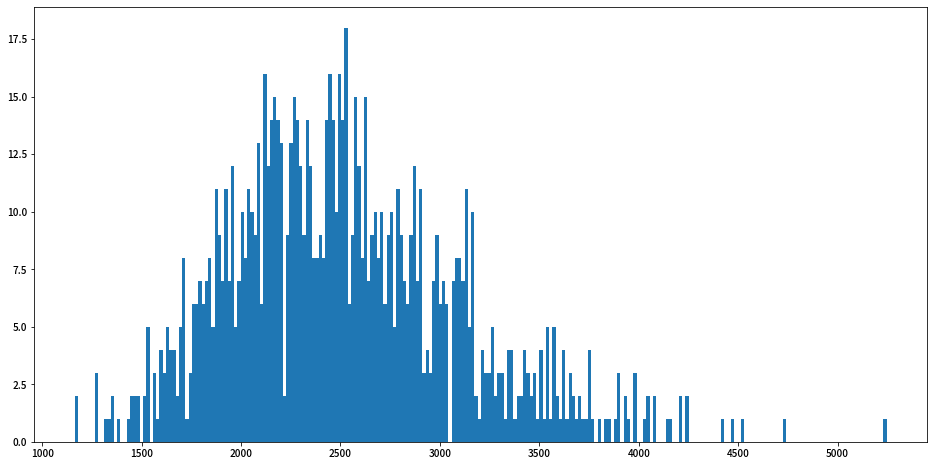

In [12]:
plt.figure(figsize=(16, 8))
end_data = [x.iloc[-1].values[0] for x in close_li]
plt.hist(end_data, bins=250)
plt.show()

In [13]:
# 95% 신뢰구간
max95 = np.mean(end_data) + (1.96 * (np.std(end_data) / math.sqrt(len(end_data))))
min95 = np.mean(end_data) - (1.96 * (np.std(end_data) / math.sqrt(len(end_data))))
print('95% Min: ', round(min95))
print('95% Max: ', round(max95))

# 평균
print('Mean: ', np.mean([round(x.iloc[-1].values[0],0) for x in close_li]))

# 중앙
print('Median: ', np.median([round(x.iloc[-1].values[0],0) for x in close_li]))

95% Min:  2484
95% Max:  2556
Mean:  2519.995
Median:  2463.5


In [14]:
kosdaq_df = fdr.DataReader('KQ11')
kosdaq_df['Change'] = kosdaq_df['Change'] + 1

In [15]:
print('mean: ', kosdaq_df['Change'].mean())
print('var : ', kosdaq_df['Change'].var())
print('skewness : ', kosdaq_df['Change'].skew())
print('kurtosis : ', kosdaq_df['Change'].kurt())

mean:  1.0001885517498137
var :  0.0002525719876992391
skewness :  -0.687455905608933
kurtosis :  6.298085109795304


In [16]:
m = kosdaq_df['Change'].mean()
var = kosdaq_df['Change'].var()

sample_num = 1000
periods = 250 # 250*40

dates = pd.date_range(start=date.today(), periods=periods)
close_li = 0
close_li = [pd.DataFrame({'Change':[random.gauss(m, math.sqrt(var)) for i in range(periods)]}, index=dates) for x in range(sample_num)]
close_li = list(map(lambda x: np.cumprod(x).rename(columns={'Change':'Close'}) * kosdaq_df['Close'][-1], close_li))

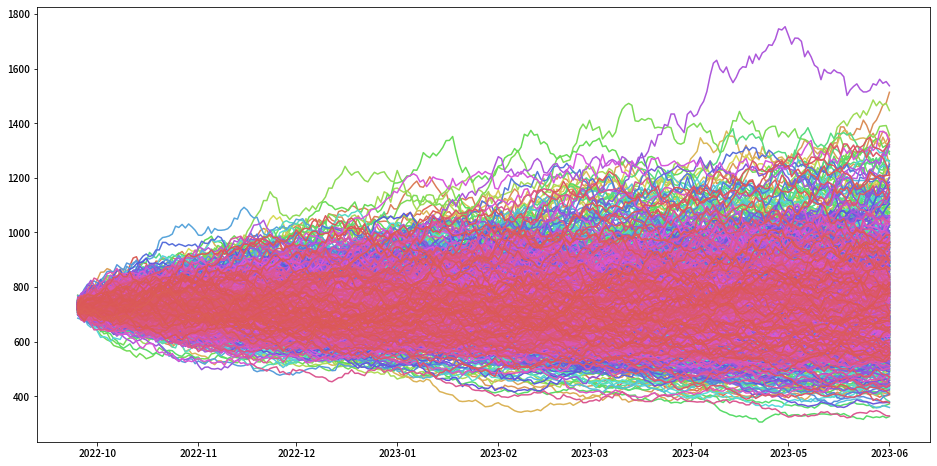

In [17]:
fig = plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
colors = list(sns.color_palette("hls", sample_num).as_hex())

for i, j in enumerate(close_li):
  ax.plot(j['Close'], color=colors[i]) #, label=i+1)

plt.show()

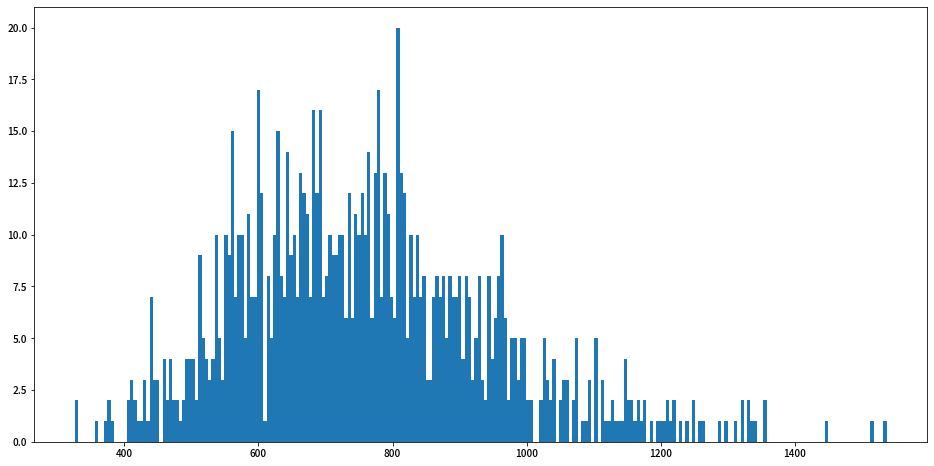

In [18]:
plt.figure(figsize=(16, 8))
end_data = [x.iloc[-1].values[0] for x in close_li]
plt.hist(end_data, bins=250)
plt.show()

In [19]:
# 95% 신뢰구간
max95 = np.mean(end_data) + (1.96 * (np.std(end_data) / math.sqrt(len(end_data))))
min95 = np.mean(end_data) - (1.96 * (np.std(end_data) / math.sqrt(len(end_data))))
print('95% Min: ', round(min95))
print('95% Max: ', round(max95))

# 평균
print('Mean: ', np.mean([round(x.iloc[-1].values[0],0) for x in close_li]))

# 중앙
print('Median: ', np.median([round(x.iloc[-1].values[0],0) for x in close_li]))

95% Min:  749
95% Max:  772
Mean:  760.349
Median:  745.0


In [20]:
market_type = {
    'all':'ALL',
    'kospi':'STK',
    'kosdaq':'KSQ'
}

def get_ranking(market, ranking_type, start_date, end_date):
  gen_url = 'http://data.krx.co.kr/comm/fileDn/GenerateOTP/generate.cmd'
  url = ''
  if ranking_type == 'highest': url = 'dbms/MDC/EASY/ranking/MDCEASY01501'
  elif ranking_type == 'traded': url = 'dbms/MDC/EASY/ranking/MDCEASY01601'
  elif ranking_type == 'marketcap': url = 'dbms/MDC/EASY/ranking/MDCEASY01701'
  start_date = start_date.strftime('%Y%m%d') if type(start_date) != str else start_date
  end_date = end_date.strftime('%Y%m%d') if type(end_date) != str else end_date
  data = {
    'locale': 'ko_KR',
    'mktId': market,
    'itmTpCd': '1',
    'itmTpCd2': '1',
    'trdDd': start_date,
    'strtDd': start_date,
    'endDd': end_date,
    'stkprcTpCd': 'Y',
    'share': '1',
    'money': '1',
    'csvxls_isNo': 'false',
    'name': 'fileDown',
    'url': url
  }
  gen_key = requests.post(gen_url, data=data).text
  down_url = 'http://data.krx.co.kr/comm/fileDn/download_csv/download.cmd'
  data = {'code':gen_key}
  r = requests.post(down_url, data=data)
  r.encoding = 'EUC-KR'
  return pd.read_csv(StringIO(r.text))

In [21]:
def get_ranking_df(start='20220613', end='20220712', freq='1D', market='kospi', ranking_type='marketcap'):
  df = pd.DataFrame()
  for d in pd.date_range(start=start, end=end, freq=freq):
    t = pd.DataFrame()
    dt = d
    if XKRX.is_session(dt) == False:
      dt = XKRX.next_open(dt).replace(tzinfo=None)
    t = get_ranking(market_type[market], ranking_type, dt.strftime('%Y%m%d'), dt.strftime('%Y%m%d'))[['순위', '종목명']]
    t['date'] = dt
    df = df.append(t, ignore_index=True)
  return df

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedFormatter, FixedLocator

def plot_bump(df='', n_top_ranked=10, title='Title'):
  top_sources = df[df["date"] == df["date"].max()].nsmallest(n_top_ranked, "순위")

  fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(ylim=(0.5, 0.5 + n_top_ranked)))
  #ax.xaxis.set_major_locator(MultipleLocator(1))
  ax.yaxis.set_major_locator(MultipleLocator(1))

  yax2 = ax.secondary_yaxis("right")
  yax2.yaxis.set_major_locator(FixedLocator(top_sources["순위"].to_list()))
  yax2.yaxis.set_major_formatter(FixedFormatter(top_sources["종목명"].to_list()))

  for k, (i, j) in enumerate(df.groupby("종목명")):
    ax.plot("date", "순위", "o-", linewidth=3, markersize=7, data=j, mfc="w")

  ax.invert_yaxis()
  ax.set(xlabel="Date", ylabel="Rank", title=title)
  plt.tight_layout()

In [23]:
from dateutil import relativedelta

t = date.today()
today = t.strftime('%Y%m%d') if XKRX.is_session(t) else XKRX.previous_open(t).replace(tzinfo=None).strftime('%Y%m%d')
w = (date.today() - relativedelta.relativedelta(weeks=1))
previous_week = w.strftime('%Y%m%d') if XKRX.is_session(w) else XKRX.next_open(w).replace(tzinfo=None).strftime('%Y%m%d')
m = (date.today() - relativedelta.relativedelta(months=1))
previous_month = m.strftime('%Y%m%d') if XKRX.is_session(m) else XKRX.next_open(m)
y = (date.today() - relativedelta.relativedelta(years=1))
previous_year = y.strftime('%Y%m%d') if XKRX.is_session(y) else XKRX.next_open(y).replace(tzinfo=None).strftime('%Y%m%d')

Market Cap Ranking Change

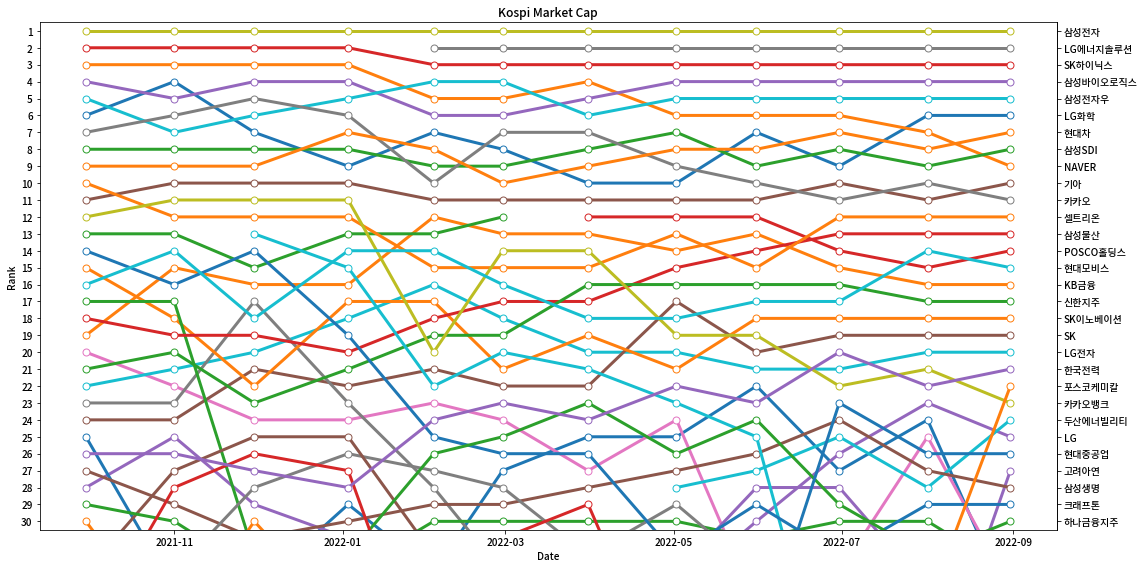

In [24]:
kospi_marketcap_ranking_df = get_ranking_df(previous_year, today, freq='1M', market='kospi', ranking_type='marketcap')
plot_bump(kospi_marketcap_ranking_df, 30, "Kospi Market Cap")

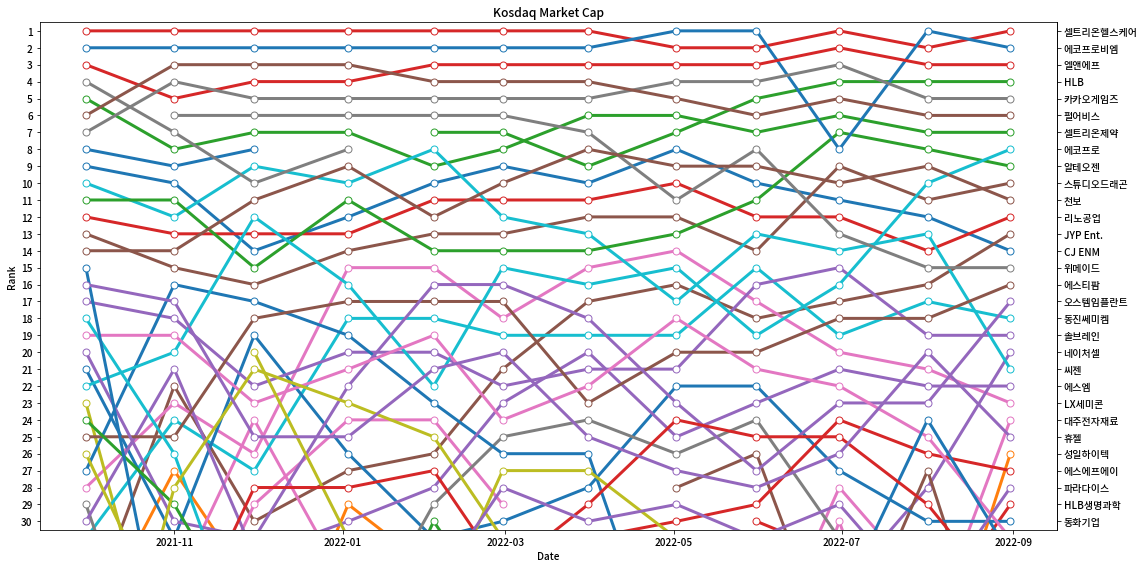

In [25]:
kosdaq_marketcap_ranking_df = get_ranking_df(previous_year, today, freq='1M', market='kosdaq', ranking_type='marketcap')
plot_bump(kosdaq_marketcap_ranking_df, 30, "Kosdaq Market Cap")

Annual King

In [26]:
get_ranking(market_type['kospi'], 'traded', previous_year, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
7,8,249420,일동제약,KOSPI,13950,28200,14250,102.15,842788484,3425969,38115870047400,154942561168
27,28,11700,한신기계,KOSPI,3550,6870,3320,93.52,1814874534,7377539,14322515895395,58221609331
11,12,11070,LG이노텍,KOSPI,217000,344500,127500,58.76,85322616,346840,28152106686227,114439458074
31,32,47810,한국항공우주,KOSPI,33150,49500,16350,49.32,289302096,1176025,13431430957508,54599312835
44,45,12450,한화에어로스페이스,KOSPI,51600,74100,22500,43.60,191173134,777127,11371648000000,46226211382
25,26,9830,한화솔루션,KOSPI,40750,49700,8950,21.96,366995268,1491851,15174911374450,61686631603
36,37,52690,한전기술,KOSPI,48750,59300,10550,21.64,159060898,646589,12814542183850,52091634894
34,35,64350,현대로템,KOSPI,24700,27150,2450,9.92,518421677,2107405,12982506359450,52774416095
24,25,3670,포스코케미칼,KOSPI,162000,175000,13000,8.02,117024447,475709,16672379090800,67773898743
42,43,17670,SK텔레콤,KOSPI,53227,52700,-527,-0.99,178432154,725334,12061710623066,49031343996


In [27]:
get_ranking(market_type['kosdaq'], 'traded', previous_year, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
37,38,16790,카나리아바이오,KOSDAQ,3003,15500,12497,416.15,162435031,660305,8637605651600,35112218096
23,24,5860,한일사료,KOSDAQ,2055,7200,5145,250.36,1840120284,7480164,12192081792640,49561308100
10,11,53050,지에스이,KOSDAQ,2025,5570,3545,175.06,3220110333,13089879,15958179087572,64870646697
13,14,90710,휴림로봇,KOSDAQ,952,2360,1408,147.90,6022938469,24483490,14823616804662,60258604897
44,45,215100,로보로보,KOSDAQ,3840,7650,3810,99.22,945386923,3843036,7828095402167,31821526025
11,12,136510,스마트솔루션즈,KOSDAQ,6940,11600,4660,67.15,632692087,2571919,15738023775630,63975706405
42,43,218150,미래생명자원,KOSDAQ,3790,6100,2310,60.95,1024172550,4163303,8113125096130,32980183318
32,33,278650,노터스,KOSDAQ,3237,4980,1743,53.85,703425104,2859452,9844237290985,40017224760
47,48,35900,JYP Ent.,KOSDAQ,39350,59800,20450,51.97,139542642,567247,7292239752150,29643251025
16,17,63080,컴투스홀딩스,KOSDAQ,34100,49400,15300,44.87,111788429,454425,13903212087350,56517122306


Montly King

In [28]:
get_ranking(market_type['kospi'], 'traded', previous_month, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
15,16,53690,한미글로벌,KOSPI,12900,24100,11200,86.82,84103945,4205197,1781609737150,89080486858
6,7,1570,금양,KOSPI,11000,19150,8150,74.09,172557057,8627853,2925192009050,146259600453
26,27,6220,제주은행,KOSPI,5740,9880,4140,72.13,155802898,7790145,1244731317340,62236565867
23,24,5950,이수화학,KOSPI,17650,25050,7400,41.93,48911579,2445579,1288046154100,64402307705
18,19,5420,코스모화학,KOSPI,22000,26500,4500,20.45,65767011,3288351,1712800393600,85640019680
27,28,10130,고려아연,KOSPI,580000,614000,34000,5.86,1911909,95595,1192609718044,59630485902
14,15,11070,LG이노텍,KOSPI,326000,344500,18500,5.67,5933833,296692,2031231079500,101561553975
11,12,3670,포스코케미칼,KOSPI,166000,175000,9000,5.42,14071570,703579,2441377783000,122068889150
10,11,6400,삼성SDI,KOSPI,591000,610000,19000,3.21,4435677,221784,2642494287290,132124714365
31,32,17670,SK텔레콤,KOSPI,51200,52700,1500,2.93,18975929,948796,984625841926,49231292096


In [29]:
get_ranking(market_type['kosdaq'], 'traded', previous_month, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
29,30,101670,코리아에스이,KOSDAQ,2265,9240,6975,307.95,79286286,3964314,682123971795,34106198590
8,9,30960,양지사,KOSDAQ,14100,38550,24450,173.40,51785359,2589268,1469380987700,73469049385
43,44,5160,동국산업,KOSDAQ,3585,5870,2285,63.74,103836566,5191828,540663649485,27033182474
11,12,118990,모트렉스,KOSDAQ,11900,18450,6550,55.04,85868381,4293419,1368894264950,68444713248
25,26,122350,삼기,KOSDAQ,3110,4775,1665,53.54,157998059,7899903,719358140650,35967907033
31,32,299030,하나기술,KOSDAQ,55600,79700,24100,43.35,8973785,448689,649665891200,32483294560
17,18,25770,한국정보통신,KOSDAQ,8920,12650,3730,41.82,65083218,3254161,856397432350,42819871618
22,23,399720,가온칩스,KOSDAQ,22700,32150,9450,41.63,26415036,1320752,739179453750,36958972688
30,31,7330,푸른저축은행,KOSDAQ,10300,14200,3900,37.86,46792714,2339636,660407654110,33020382706
6,7,95500,미래나노텍,KOSDAQ,11300,15550,4250,37.61,152677485,7633874,2101976036650,105098801833


Weekly King

In [30]:
get_ranking(market_type['kospi'], 'traded', previous_week, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
29,30,10660,화천기계,KOSPI,3110,5900,2790,89.71,48505551,9701110,265521719400,53104343880
4,5,6220,제주은행,KOSPI,7130,9880,2750,38.57,92937905,18587581,820681411980,164136282396
40,41,24890,대원화성,KOSPI,2870,3395,525,18.29,56987281,11397456,193639672025,38727934405
35,36,10620,현대미포조선,KOSPI,99000,111500,12500,12.63,2075740,415148,219293745000,43858749000
36,37,14580,태경비케이,KOSPI,5320,5990,670,12.59,35284477,7056895,218381692680,43676338536
28,29,2140,고려산업,KOSPI,5370,6000,630,11.73,42424873,8484975,269135938630,53827187726
34,35,150,두산,KOSPI,84100,87800,3700,4.40,2500070,500014,220397621000,44079524200
14,15,11070,LG이노텍,KOSPI,332500,344500,12000,3.61,1201144,240229,414920048500,82984009700
31,32,329180,현대중공업,KOSPI,120000,124000,4000,3.33,2115602,423120,256399551500,51279910300
41,42,33780,KT&G,KOSPI,83700,86400,2700,3.23,2256567,451313,193419940000,38683988000


In [31]:
get_ranking(market_type['kosdaq'], 'traded', previous_week, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
37,38,73570,WI,KOSDAQ,911,1925,1014,111.31,82439271,16487854,147411441426,29482288285
9,10,40300,YTN,KOSDAQ,3950,6520,2570,65.06,76399681,15279936,474053210170,94810642034
15,16,53700,삼보모터스,KOSDAQ,4900,6980,2080,42.45,44815727,8963145,304123051945,60824610389
1,2,30960,양지사,KOSDAQ,27900,38550,10650,38.17,17550751,3510150,763330765700,152666153140
22,23,396270,넥스트칩,KOSDAQ,9770,13300,3530,36.13,18445454,3689091,239773255880,47954651176
12,13,5860,한일사료,KOSDAQ,5310,7200,1890,35.59,61432959,12286592,425903845600,85180769120
5,6,399720,가온칩스,KOSDAQ,24300,32150,7850,32.30,18810134,3762027,556721741650,111344348330
6,7,3310,대주산업,KOSDAQ,2845,3730,885,31.11,148815882,29763176,541677364110,108335472822
13,14,362320,청담글로벌,KOSDAQ,7820,9220,1400,17.90,40927201,8185440,398927798540,79785559708
40,41,52220,iMBC,KOSDAQ,3065,3600,535,17.46,37676716,7535343,147101143330,29420228666


Daily King

In [32]:
get_ranking(market_type['kospi'], 'traded', today, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
9,10,8420,문배철강,KOSPI,3755,4880,1125,29.96,26510114,26510114,126169414350,126169414350
2,3,6220,제주은행,KOSPI,8010,9880,1870,23.35,31566556,31566556,291223227210,291223227210
30,31,26940,부국철강,KOSPI,3500,4030,530,15.14,13339351,13339351,55456152845,55456152845
43,44,71090,하이스틸,KOSPI,4410,4605,195,4.42,9083111,9083111,44524060555,44524060555
39,40,86790,하나금융지주,KOSPI,38150,39150,1000,2.62,1214220,1214220,46911991750,46911991750
38,39,17670,SK텔레콤,KOSPI,51400,52700,1300,2.53,905884,905884,47306321700,47306321700
36,37,55550,신한지주,KOSPI,36050,36950,900,2.50,1306358,1306358,47909652900,47909652900
6,7,35420,NAVER,KOSPI,206500,210500,4000,1.94,655441,655441,137676988105,137676988105
33,34,10130,고려아연,KOSPI,604000,614000,10000,1.66,85266,85266,52725712412,52725712412
22,23,10620,현대미포조선,KOSPI,110000,111500,1500,1.36,601549,601549,67588862000,67588862000


In [33]:
get_ranking(market_type['kosdaq'], 'traded', today, today).sort_values('등락률', ascending=False).head(10)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
14,15,131400,이브이첨단소재,KOSDAQ,1720,2235,515,29.94,34721372,34721372,70938973965,70938973965
35,36,192410,휴림네트웍스,KOSDAQ,1055,1305,250,23.70,25574748,25574748,32424838980,32424838980
15,16,412350,레이저쎌,KOSDAQ,8110,9790,1680,20.72,7246222,7246222,70024627850,70024627850
0,1,399720,가온칩스,KOSDAQ,26800,32150,5350,19.96,11956886,11956886,378073654700,378073654700
19,20,45970,코아시아,KOSDAQ,6970,8000,1030,14.78,8018501,8018501,63893145530,63893145530
17,18,39240,경남스틸,KOSDAQ,3360,3750,390,11.61,16424623,16424623,64817968035,64817968035
3,4,5160,동국산업,KOSDAQ,5390,5870,480,8.91,31923022,31923022,192153356070,192153356070
47,48,86960,MDS테크,KOSDAQ,16500,17800,1300,7.88,1268258,1268258,22630634150,22630634150
16,17,7330,푸른저축은행,KOSDAQ,13250,14200,950,7.17,4559389,4559389,65489730350,65489730350
11,12,123410,코리아에프티,KOSDAQ,3945,4220,275,6.97,19550321,19550321,82551278785,82551278785


In [34]:
sector_dic = {'에너지': 'WI100', '화학': 'WI110', '비철금속': 'WI200', '철강': 'WI210', '건설': 'WI220', '기계': 'WI230', '조선': 'WI240', '상가,자본재': 'WI250', \
       '운송': 'WI260', '자동차': 'WI300', '화장품,의류': 'WI310', '호텔,레저': 'WI320', '미디어,교육': 'WI330', '소매(유통)': 'WI340', '필수소비재': 'WI400', \
       '건강관리': 'WI410', '은행': 'WI500', '증권': 'WI510', '보험': 'WI520', '소프트웨어': 'WI600', 'IT하드웨어': 'WI610', '반도체': 'WI620', 'IT가전': 'WI630', \
       '디스플레이': 'WI640', '전기통신서비스': 'WI700', '유틸리티': 'WI800'}

sheets = ['Index Value', 'Return', 'Valuation Ratio', 'Risk & Performance Ratio']

In [35]:
def get_sector(sector, term, current_date, pre_year=3):
  id = sector_dic[sector]
  name = 'WI26' + sector
  current_date = current_date if XKRX.is_session(current_date) else XKRX.previous_open(current_date)
  previous_date = (datetime.strptime(current_date, '%Y%m%d') - relativedelta.relativedelta(years=pre_year))
  previous_date = previous_date if XKRX.is_session(previous_date) else XKRX.next_open(previous_date)

  current_date = datetime.strptime(current_date, '%Y%m%d').strftime('%Y-%m-%d') \
  if type(current_date) == str else current_date.strftime('%Y-%m-%d')
  previous_date = datetime.strptime(previous_date, '%Y%m%d').strftime('%Y-%m-%d') \
  if type(previous_date) == str else previous_date.strftime('%Y-%m-%d')
  t = {
      'day' : '1',
      'week' : '2',
      'month' : '3',
      'quarter' : '4'
  }
  headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'}
  url = 'https://www.wiseindex.com/DataCenter/ExportToExcel?index_ids=' + \
    id + '&index_names=' + name + '&tabs=1,2,3,4&fromDT=' + \
    previous_date + '&endDT=' + current_date + '&term=' + t[term] + '&isEnd=1'
  res = requests.get(url, headers = headers)
  xls = pd.ExcelFile(res.content)
  return xls

In [36]:
energy = get_sector('에너지', 'month', today, 3)

In [37]:
def get_sheet(elx, sheets):
  df = pd.read_excel(elx, sheets) 
  df.columns = df.iloc[0]
  df = df.iloc[::-1]
  df = df.drop(0)
  df = df[1:].set_index('일자')
  return df

In [38]:
sectors = {}
for sector in list(sector_dic):
  sectors[sector] = get_sheet(get_sector(sector, 'month', today, 3), sheets[0])

Sector Market Cap

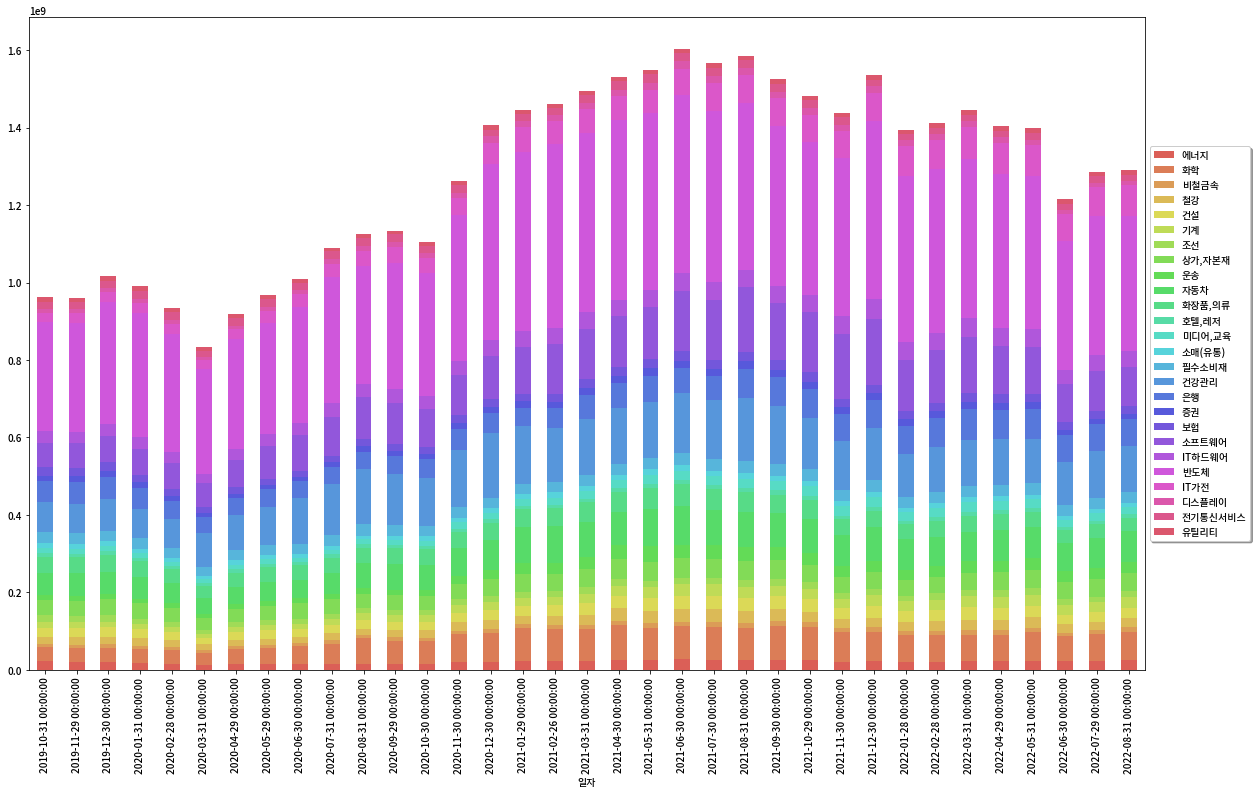

In [39]:
data = dict([(x,sectors[x]['시가총액 (백만)']) for x in sectors])

colors = list(sns.color_palette("hls", len(sector_dic)).as_hex())

fig = plt.figure(figsize=(20, 12))
ax = plt.subplot(111)
pd.DataFrame(data).plot.bar(stacked=True, ax=ax, color=colors)
ax.legend(loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
plt.show()

Sector Traded Value / Market

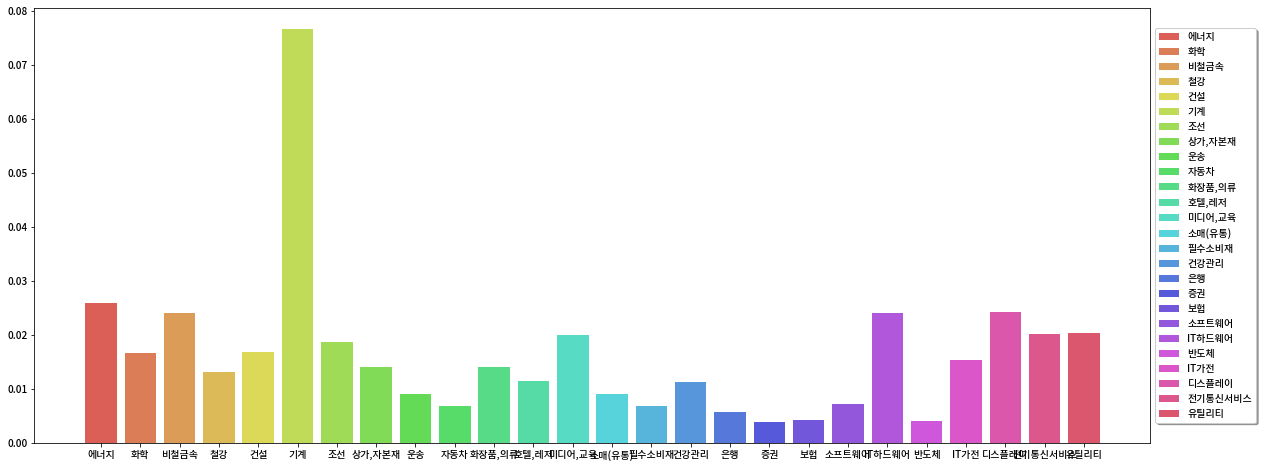

In [40]:
fig = plt.figure(figsize=(20, 8))
ax = plt.subplot(111)

for i, sector in enumerate(list(sector_dic)):
  ax.bar(sector, (sectors[sector]['거래대금 (백만)']/sectors[sector]['시가총액 (백만)'])[-1], color=colors[i], label=sector)

ax.legend(loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
plt.show()

Sector Momentum

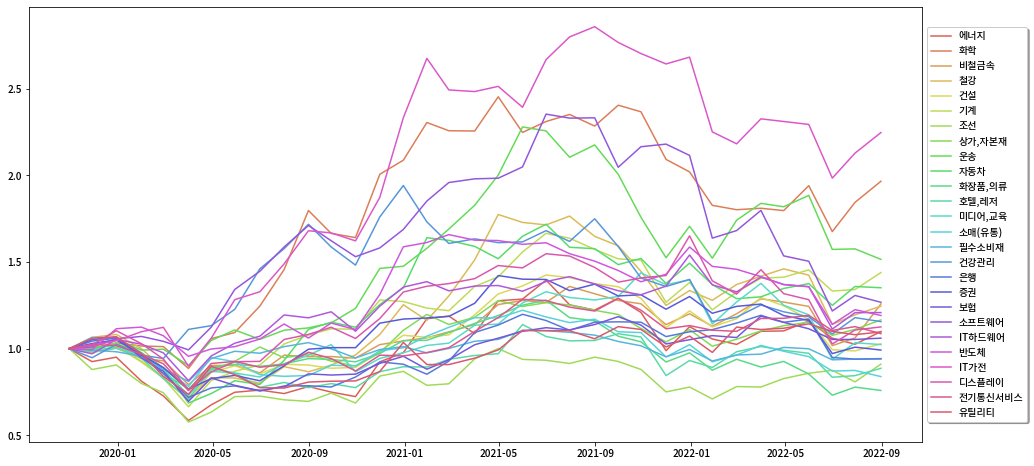

In [41]:
fig = plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
colors = list(sns.color_palette("hls", len(sector_dic)).as_hex())

for i, sector in enumerate(list(sector_dic)):
  ax.plot(sectors[sector]['지수값']/sectors[sector]['지수값'][0], color=colors[i], label=sector)

ax.legend(loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
plt.show()